<a href="https://colab.research.google.com/github/kavitha0821/Coke-sales-Analysis/blob/main/Chat_gpt_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reasoning: Import the pandas library and load the CSV file into a DataFrame.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load CSV file from the local drive
df = pd.read_csv("chatgpt_reviews (5).csv")

# Show the first few rows
display(df.head())

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


Display Column Names


In [ ]:
# Print the column names of the dataset.
print(df.columns)

Index(['Review Id', 'Review', 'Ratings', 'Review Date'], dtype='object')


Standardize column names

In [ ]:
# Standardize the column names: convert to lowercase and replace spaces with underscores.

# Replacing all spaces with underscore(_) and converting the entire string to lowercase

df.columns = df.columns.str.lower().str.replace(" ", "_")

# Showing the column headers again
df.columns

Index(['review_id', 'review', 'ratings', 'review_date'], dtype='object')

Handle missing Data

In [ ]:
# Check for missing values
print(df.isnull().sum())


review_id      0
review         0
ratings        0
review_date    0
dtype: int64


Drop rows where values are missing


In [ ]:
# # Print the count of missing values in each column by droping the reviews
df = df.dropna(subset=['review'])
print(df.isnull().sum())


review_id      0
review         0
ratings        0
review_date    0
dtype: int64


Show the datatypes

In [ ]:
#Show the datatypes
print(df.dtypes)

review_id      object
review         object
ratings         int64
review_date    object
dtype: object


 Convert the 'review_date' column to datetime objects to enable time-based analysis. Then, display the data types to confirm the change.

In [ ]:
df['review_date']=pd.to_datetime(df['review_date'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20843 entries, 0 to 20842
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    20843 non-null  object        
 1   review       20843 non-null  object        
 2   ratings      20843 non-null  int64         
 3   review_date  20842 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 651.5+ KB
None


To perform Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity using TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply TextBlob sentiment analysis to the 'review' column
df['sentiment_score'] = df['review'].apply(get_textblob_sentiment)

# Function to categorize sentiment based on polarity score
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Categorize sentiment based on the TextBlob score
df['sentiment'] = df['sentiment_score'].apply(categorize_sentiment)

# Display the first few rows with the new sentiment columns
display(df[['review', 'sentiment_score', 'sentiment']].head())

,review,sentiment_score,sentiment
0,good,0.7000,Positive
1,good,0.7000,Positive
2,nice app,0.6000,Positive
3,"nice, ig",0.6000,Positive
4,"this is a great app, the bot is so accurate to...",0.4125,Positive


Insights :

We can now quantify the emotional tone of customer feedback.

We can measure what percentage of reviews are positive, negative, or neutral.

We can compute the average sentiment score across all reviews to gauge overall satisfaction.

To detect common problems driving negative reviews


In [ ]:
# Filter for negative reviews
negative_reviews = df[df['sentiment'] == 'Negative']

# Display the first few negative reviews
display(negative_reviews.head())

,review_id,review,ratings,review_date,sentiment_score,sentiment
10,17769ae4-51f6-439c-af12-f59d242e1f6b,I am not very happy with this because chatgpt ...,3,2024-08-23 19:09:14,-0.172527,Negative
119,13fb28dc-df81-4ef0-8842-edd3625fa600,not good,1,2024-08-23 16:41:21,-0.350000,Negative
134,0e0adf90-8e2d-402a-8cc1-c82275b958a8,Too expensive,1,2024-08-23 16:20:49,-0.500000,Negative
176,f86c8ac6-325e-4f3c-83a6-eed16c8e845e,"Correct answer Accuracy 10 %,always provide wr...",1,2024-08-23 15:46:16,-0.500000,Negative
222,edc628fe-24ad-4bb5-8a16-113ec8fec341,"I get a ""something went wrong"" error so I can'...",1,2024-08-23 15:15:03,-0.500000,Negative


Insights :

We can perform qualitative analysis to understand customer pain points.

Common keywords or topics in these reviews can reveal recurring complaints

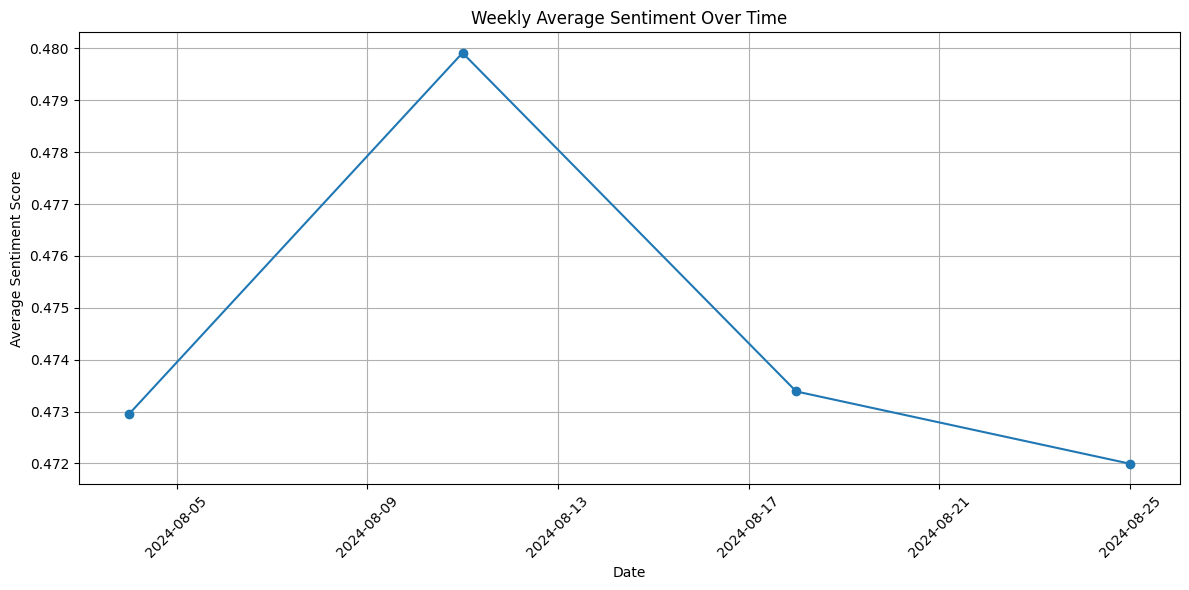

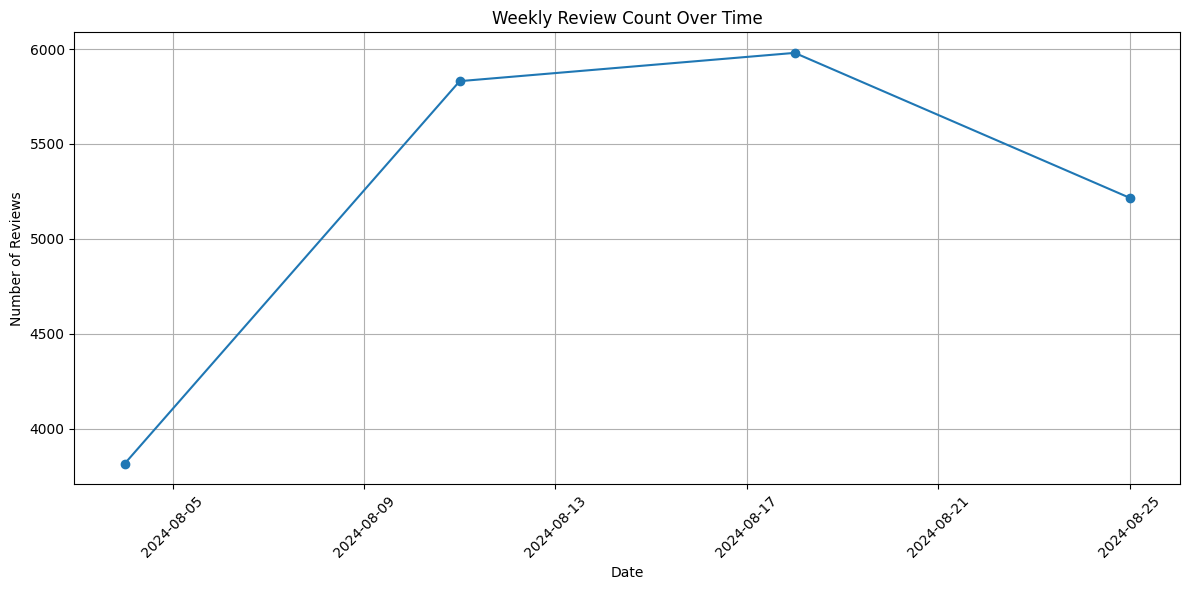

In [ ]:
# Set 'review_date' as the index for time-series analysis
df_time_series = df.set_index('review_date')

# Resample the data weekly and calculate the mean sentiment score and the count of reviews
weekly_sentiment = df_time_series.resample('W')['sentiment_score'].agg(['mean', 'count'])

# Plot the weekly mean sentiment score
plt.figure(figsize=(12, 6))
plt.plot(weekly_sentiment.index, weekly_sentiment['mean'], marker='o', linestyle='-')
plt.title('Weekly Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the weekly count of reviews
plt.figure(figsize=(12, 6))
plt.plot(weekly_sentiment.index, weekly_sentiment['count'], marker='o', linestyle='-')
plt.title('Weekly Review Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights from this graph:

Shows how customer sentiment changes over time.

Identify periods of improvement or decline in satisfaction.

Indicates review activity trends.

